In [21]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IBM_Attrition_Data.csv')

In [3]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
df.isna().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [6]:
X = df[['Age', 'JobSatisfaction', 'MonthlyIncome', 'WorkLifeBalance']].values
y = df['Attrition'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [9]:
knn.score(X_test, y_test)

0.8197278911564626

In [10]:
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    
    
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8732993197278912, 3: 0.875, 4: 0.8528911564625851, 5: 0.8511904761904762, 6: 0.8477891156462585, 7: 0.8486394557823129, 8: 0.8443877551020408, 9: 0.842687074829932, 10: 0.8401360544217688, 11: 0.842687074829932, 12: 0.8401360544217688} 
 {1: 0.6904761904761905, 2: 0.8095238095238095, 3: 0.7857142857142857, 4: 0.8163265306122449, 5: 0.7959183673469388, 6: 0.8197278911564626, 7: 0.7993197278911565, 8: 0.8333333333333334, 9: 0.8333333333333334, 10: 0.8367346938775511, 11: 0.8299319727891157, 12: 0.8299319727891157}


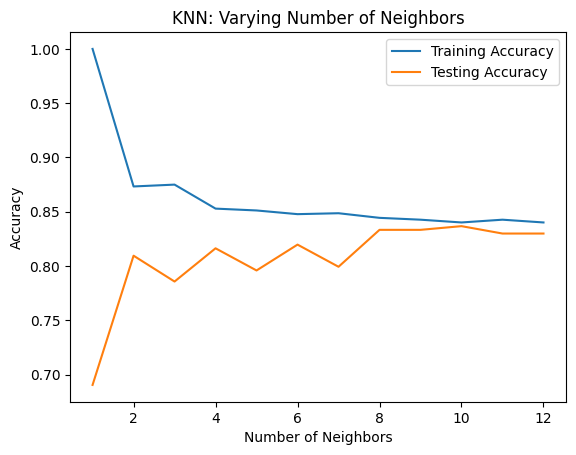

In [11]:
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label='Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [12]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [13]:
y_pred = knn.predict(X_test)

In [17]:
print(confusion_matrix(y_test, y_pred))

[[239   8]
 [ 45   2]]


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.97      0.90       247
         Yes       0.20      0.04      0.07        47

    accuracy                           0.82       294
   macro avg       0.52      0.51      0.49       294
weighted avg       0.74      0.82      0.77       294



### Logistic Regression

In [23]:
attrition_names = {
                    'No': 0,
                    'Yes': 1,
}

df['Attrition'] = df['Attrition'].map(attrition_names)

In [24]:
y = df['Attrition'].values
X = df[['Age', 'JobSatisfaction', 'MonthlyIncome', 'WorkLifeBalance']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
y_pred_probs[:10]

array([0.25537379, 0.15108211, 0.09382768, 0.06268393, 0.18340804,
       0.10787003, 0.09677466, 0.0444437 , 0.13721326, 0.27820817])

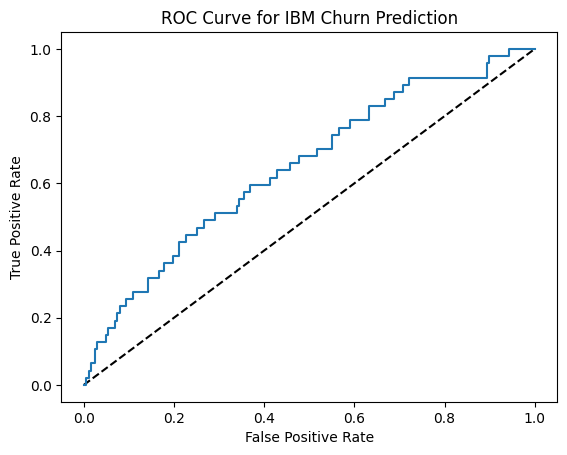

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0 ,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for IBM Churn Prediction')
plt.show()